# **Data and Model Visualization**

### Graph-maker

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob

new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

# List of file patterns for multiple models
file_patterns = [
    #'csv_results/TinyVGG_stock_no_aug/TinyVGG_*_seed_50_epochs_no_aug.csv',
    #'csv_results/AJ_CNN_stock_no_aug/AJ_CNN_*_seed_50_epochs_no_aug.csv',
    'csv_results/AJ_CNN_grid_search_no_aug/AJ_CNN_*_seed_100_epochs_no_aug.csv',
    'csv_results/AJ_CNN_grid_search_with_aug/AJ_CNN_*_seed_100_epochs_ManualAugment.csv',
    'csv_results/AJ_CNN_random_search_no_aug/AJ_CNN_*_seed_100_epochs_no_aug.csv',
    'csv_results/AJ_CNN_random_search_with_aug/AJ_CNN_*_seed_100_epochs_ManualAugment.csv',
]

# Load multiple CSV files for each model
dfs = []
for file_pattern in file_patterns:
    file_paths = glob.glob(file_pattern)
    model_name = file_pattern.split('/')[1].replace('_', ' ')  # Extracting the model name from the file pattern
    dfs.extend([pd.read_csv(file).assign(Model=model_name) for file in file_paths])

# Concatenate dataframes
df_concatenated = pd.concat(dfs)

# Set the style of seaborn for better visualization
sns.set(style="darkgrid")

#labels = ['train_acc', 'test_acc']
label = 'test_acc'
#label = 'train_acc'

# Plot using seaborn.lineplot() for train and test accuracy with variability
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=df_concatenated, x='epoch', y=label, hue='Model',
                  dashes=False, errorbar='sd', n_boot=1300, err_style='band', linewidth=2.5)

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.title('Test Accuracy across Multiple Models and Seeds')

# Show the plot
plt.tight_layout()
plt.savefig('search_method_test_acc_sd.svg', format='svg', pad_inches=0)
plt.show()

In [11]:
file_patterns = [
    'csv_results/AJ_CNN_Vanilla/AJ_CNN_*_seed_50_epochs_no_aug.csv',
    #'csv_results/AutoAugment/AJ_CNN_*_seed_50_epochs_AutoAugment.csv',
    #'csv_results/RandAugment/AJ_CNN_*_seed_50_epochs_RandAugment.csv',
    #'csv_results/AugMix/AJ_CNN_*_seed_50_epochs_AugMix.csv',
    #'csv_results/TrivialAugmentWide/AJ_CNN_*_seed_50_epochs_TrivialAugmentWide.csv',
    'csv_results/ManualAugment/AJ_CNN_*_seed_50_epochs_ManualAugment.csv',
]

In [72]:
file_patterns = [
    #'csv_results/AJ_CNN_Grid_Search/AJ_CNN_*_seed_100_epochs_no_aug.csv',
    #'csv_results/AJ_CNN_Grid_Search_+_Aug/AJ_CNN_*_seed_100_epochs_ManualAugment.csv',
    #'csv_results/AJ_CNN_Random_Search/AJ_CNN_*_seed_100_epochs_no_aug.csv',
    #'csv_results/AJ_CNN_Random_Search_+_Aug/AJ_CNN_*_seed_100_epochs_ManualAugment.csv',
    #'csv_results/AJ_CNN_Vanilla_+_Aug/AJ_CNN_*_seed_100_epochs_ManualAugment.csv',
    'csv_results/AJ_CNN_Vanilla/AJ_CNN_*_seed_50_epochs_no_aug.csv',
    #'csv_results/TinyVGG_Vanilla/TinyVGG_*_seed_50_epochs_no_aug.csv',
    'csv_results/AutoAugment/AJ_CNN_*_seed_50_epochs_AutoAugment.csv',
]

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
import glob
import numpy as np

#new_rc_params = {'text.usetex': False, 'svg.fonttype': 'none'}
#mpl.rcParams.update(new_rc_params)

# Load multiple CSV files for each model
dfs = []
for file_pattern in file_patterns:
    file_paths = glob.glob(file_pattern)
    model_name = file_pattern.split('/')[1].replace('_', ' ')  # Extracting the model name from the file pattern
    dfs.extend([pd.read_csv(file).assign(Model=model_name) for file in file_paths])

# Concatenate dataframes
df_concatenated = pd.concat(dfs)

# Set the style of seaborn for better visualization
sns.set(style="darkgrid")

#### Graph: test accuracy

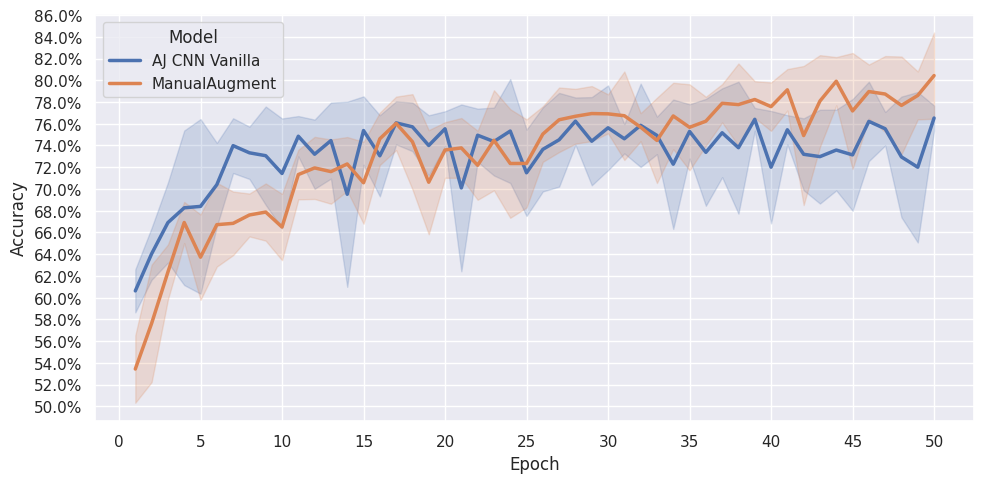

In [13]:
# Define a function to format y-axis as percentages
def percent_formatter(x, pos):
    return f'{x * 100:.1f}%'

# Plot using seaborn.lineplot() for train and test accuracy with variability
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=df_concatenated, x='epoch', y='test_acc', hue='Model',
                  dashes=False, errorbar='sd', n_boot=1300, err_style='band', linewidth=2.5)

# Set the y-axis formatter to the defined percentage formatter
ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')  # Adjust the y-axis label
plt.locator_params(axis='both', nbins=20)
#plt.axis([80, 100, .70, .90])
#plt.axis([40, 50, .7, .85])

# Show the plot
plt.tight_layout()
plt.savefig('aug_test_acc_sd.svg', format='svg', pad_inches=0)
plt.show()

#### Graph: train accuracy

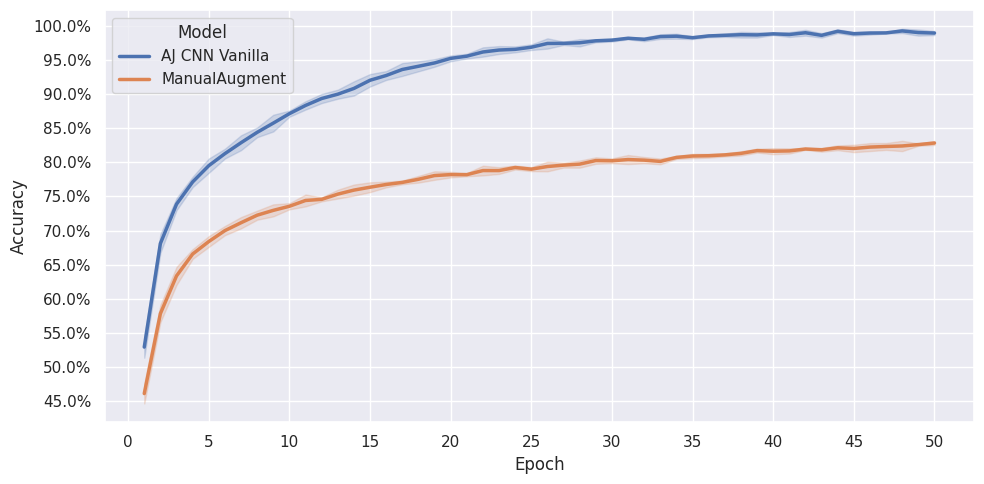

In [15]:
# Define a function to format y-axis as percentages
def percent_formatter(x, pos):
    return f'{x * 100:.1f}%'

# Plot using seaborn.lineplot() for train and test accuracy with variability
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=df_concatenated, x='epoch', y='train_acc', hue='Model',
                  dashes=False, errorbar='sd', n_boot=1300, err_style='band', linewidth=2.5)

# Set the y-axis formatter to the defined percentage formatter
ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')  # Adjust the y-axis label
plt.locator_params(axis='both', nbins=20)
#plt.axis([80, 100, .70, .90])

# Show the plot
plt.tight_layout()
plt.savefig('aug_train_acc_sd.svg', format='svg', pad_inches=0)
plt.show()

#### Graph: test loss

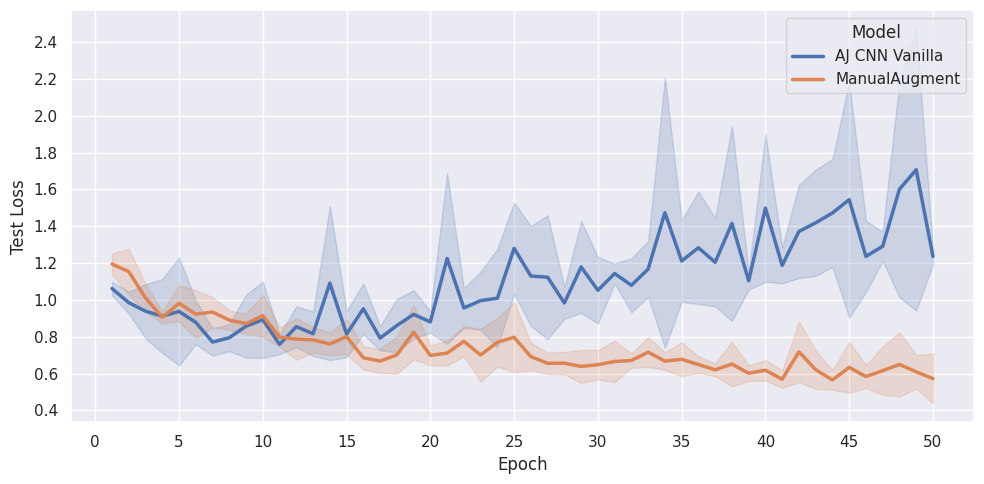

In [14]:
# Plot using seaborn.lineplot() for train and test accuracy with variability
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=df_concatenated, x='epoch', y='test_loss', hue='Model',
                  dashes=False, errorbar='sd', n_boot=1300, err_style='band', linewidth=2.5)

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Test Loss')  # Adjust the y-axis label
plt.locator_params(axis='both', nbins=20) 
#plt.axis([40, 50, .4, .8])

# Show the plot
plt.tight_layout()
plt.savefig('aug_test_loss_sd.svg', format='svg', pad_inches=0)
plt.show()

### Model complexity calculation

In [4]:
from scripts import model
import torch
from ptflops import get_model_complexity_info

TinyVGG = model.TinyVGG(input_shape=3, output_shape=5, hidden_units=10)
AJ_CNN = model.AJ_CNN(input_shape=3, output_shape=5, hidden_units=12)

In [5]:
with torch.cuda.device(0):
    net = TinyVGG
    macs, params = get_model_complexity_info(net, (3, 64, 64), as_strings=True,
                                            print_per_layer_stat=True, verbose=True)
    print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
    print('{:<30}  {:<8}'.format('Number of parameters: ', params))

TinyVGG(
  11.46 k, 100.000% Params, 5.82 MMac, 97.786% MACs, 
  (conv_block_1): Sequential(
    1.19 k, 10.379% Params, 4.46 MMac, 74.967% MACs, 
    (0): Conv2d(280, 2.442% Params, 1.08 MMac, 18.080% MACs, 3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(0, 0.000% Params, 38.44 KMac, 0.646% MACs, )
    (2): Conv2d(910, 7.937% Params, 3.28 MMac, 55.031% MACs, 10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(0, 0.000% Params, 36.0 KMac, 0.605% MACs, )
    (4): MaxPool2d(0, 0.000% Params, 36.0 KMac, 0.605% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    1.82 k, 15.874% Params, 1.35 MMac, 22.677% MACs, 
    (0): Conv2d(910, 7.937% Params, 713.44 KMac, 11.985% MACs, 10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(0, 0.000% Params, 7.84 KMac, 0.132% MACs, )
    (2): Conv2d(910, 7.937% Params, 615.16 KMac, 10.334% MACs, 10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(0, 0.000% Params, 6.76 KMac, 0.

In [6]:
with torch.cuda.device(0):
    net = AJ_CNN
    macs, params = get_model_complexity_info(net, (3, 64, 64), as_strings=True,
                                            print_per_layer_stat=True, verbose=True)
    print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
    print('{:<30}  {:<8}'.format('Number of parameters: ', params))

AJ_CNN(
  14.11 k, 100.000% Params, 5.32 MMac, 97.134% MACs, 
  (conv_block_1): Sequential(
    348, 2.467% Params, 1.52 MMac, 27.836% MACs, 
    (0): Conv2d(324, 2.297% Params, 1.33 MMac, 24.244% MACs, 3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, 0.170% Params, 98.3 KMac, 1.796% MACs, 12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(0, 0.000% Params, 49.15 KMac, 0.898% MACs, )
    (3): MaxPool2d(0, 0.000% Params, 49.15 KMac, 0.898% MACs, kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (dropblock): DropBlock2D(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
  (conv_block_2): Sequential(
    2.64 k, 18.717% Params, 2.75 MMac, 50.285% MACs, 
    (0): Conv2d(2.59 k, 18.376% Params, 2.65 MMac, 48.489% MACs, 12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(48, 0.340% Params, 49.15 KMac, 0.898% MACs, 24, eps=1e-05, momentum=0.1, affine=True,

### Yes